# Inferencia en imágenes

In [1]:
from datasets import load_from_disk
from transformers import pipeline
from transformers.pipelines.pt_utils import KeyDataset
import numpy as np
from Utils import confusion_matrix, compute_metrics

# Parámetros
_checkpoint = '/Users/julio/Documents/PMM/Codigos/Test1/Classification-ViT/SavedModels/ViT-base-patch16-224_G/checkpoint-10998'  # path al checkpoint a cargar
classifier = pipeline("image-classification", model=_checkpoint, device="mps")

## En dataset

In [2]:
_dataset_test = '/Users/julio/Documentos-Local/data/VinDr-Mammo/subsets/images_3categories_balanced_augmented_V3_split/test'

dataset = load_from_disk(_dataset_test)

In [3]:
labels = dataset.features['label'].names

label2id = {c:idx for idx,c in enumerate(labels)}
id2label = {idx:c for idx,c in enumerate(labels)}

In [4]:
labels = ['calcificaciones', 'masas', 'sin hallazgos']

### Realizar Predicciones

In [5]:
# Inicializar listas para las etiquetas reales y predichas
y_true = []
y_pred = []

# Inferencia sobre el conjunto de test
for sample in dataset:
    # Realizar predicción sobre la imagen
    prediction = classifier(sample['image'])[0]  # Primera predicción más probable
    predicted_label = prediction['label']
    
    # Guardar las etiquetas real y predicha
    y_true.append(sample['label'])  # Índice de etiqueta real
    y_pred.append(label2id[predicted_label])  # Convertir la predicción a índice

### Matriz de confusion

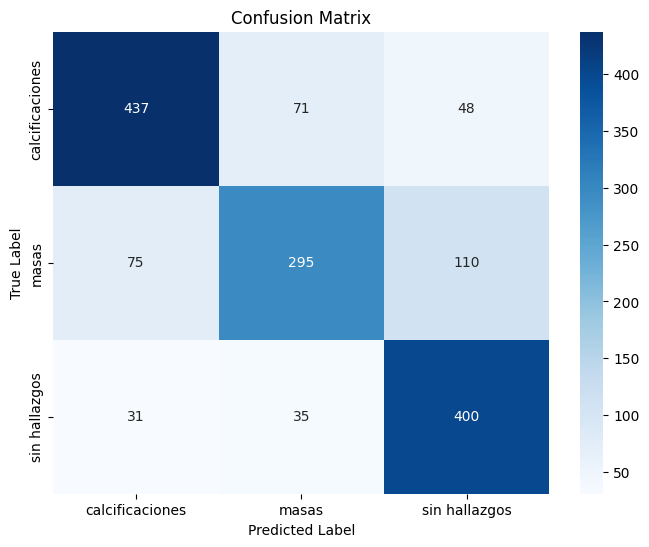

In [6]:
# Crear un diccionario para simular la estructura esperada por la función de Utils
samples_dict = {'label': np.array(y_true)}  # Las etiquetas reales como array

# Ocupar función de utils
confusion_matrix(samples_dict, y_pred, labels)

In [7]:
# mostrar las métricas
metrics = compute_metrics(y_true, y_pred)
print("Métricas finales:", metrics)

Precision por clase: {'precision': array([0.80478821, 0.73566085, 0.71684588])} 

Métricas finales: {'accuracy': 0.7536617842876165, 'precision': 0.7524316465481643, 'recall': 0.7529745516891208, 'f1': 0.7487373186403765}


### Mostrar algunas predicciones

In [13]:
cont = 0
for i, out in enumerate(classifier(KeyDataset(dataset, "image"))):
    if cont > 100:
        break
    else:
        predicted_label = out[0]['label']
        predicted_score = out[0]['score']
        real_label = id2label[dataset[i]['label']]  # Obtener la etiqueta real
        print(f"Predicción: {predicted_label} - {predicted_score * 100:.2f}%, Etiqueta real: {real_label}")
        cont += 1


Predicción: calcificaciones - 76.48%, Etiqueta real: masas
Predicción: no_encontrado - 69.22%, Etiqueta real: no_encontrado
Predicción: calcificaciones - 49.33%, Etiqueta real: calcificaciones
Predicción: calcificaciones - 91.59%, Etiqueta real: masas
Predicción: no_encontrado - 93.57%, Etiqueta real: no_encontrado
Predicción: no_encontrado - 66.67%, Etiqueta real: no_encontrado
Predicción: calcificaciones - 91.62%, Etiqueta real: calcificaciones
Predicción: no_encontrado - 89.02%, Etiqueta real: no_encontrado
Predicción: calcificaciones - 97.39%, Etiqueta real: calcificaciones
Predicción: no_encontrado - 90.05%, Etiqueta real: masas
Predicción: no_encontrado - 52.54%, Etiqueta real: calcificaciones
Predicción: no_encontrado - 94.30%, Etiqueta real: calcificaciones
Predicción: calcificaciones - 90.37%, Etiqueta real: masas
Predicción: no_encontrado - 91.98%, Etiqueta real: masas
Predicción: no_encontrado - 99.83%, Etiqueta real: no_encontrado
Predicción: no_encontrado - 97.95%, Etiquet

## Por imagen 

In [3]:
classifier('/Users/julio/Library/Mobile Documents/com~apple~CloudDocs/Downloads/masas.png')

[{'label': 'masas', 'score': 0.8299440741539001},
 {'label': 'no_encontrado', 'score': 0.11964523047208786},
 {'label': 'calcificaciones', 'score': 0.05041071027517319}]